In [151]:
import pandas as pd
import seaborn as sns

In [152]:
raw_df = pd.read_csv('../data/raw/raw_listings2.csv', index_col=0)
print(len(raw_df))

86197


In [153]:
raw_df.head()

,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,municipal_eval,price
0,2 storey,1191.3,4076.29,3.0,1.0,2.0,Beauport,202012.0,2004.0,256000.0,332500.0
0,Open area,1261.0,9500.00,2.0,1.0,1.0,Deschambault,202112.0,1957.0,150500.0,265000.0
0,NaN,1645.0,1360.00,3.0,1.0,3.0,Mercier,202111.0,2006.0,479400.0,612000.0
0,Link,2024.0,17000.00,4.0,3.0,1.0,Stoneham,202112.0,2019.0,NaN,526500.0
0,Waterfront,1469.0,16970.00,4.0,2.0,2.0,Trois-Rivières,202111.0,1925.0,NaN,NaN


In [154]:
processed_df = raw_df.copy()

In [155]:
print(len(processed_df))

86197


## Style

In [156]:
processed_df['style'].value_counts(dropna=False).iloc[0:10]

NaN                 17271
2 storey            15883
Open area           15141
Detached            10053
Side split           2814
New construction     2669
Rural                2567
Semi-detached        2536
Townhouse            1842
Waterfront           1827
Name: style, dtype: int64

In [157]:
processed_df['style'] = processed_df['style'].fillna('Unknown')
styles = processed_df['style'].value_counts()
processed_df = processed_df[processed_df['style'].isin(styles.keys())]

In [158]:
print(len(processed_df))

86197


## Living Area

In [159]:
processed_df['living_area'].value_counts(dropna=False).iloc[0:5]

1200.0    2253
NaN       2052
960.0     1218
1000.0    1104
1120.0    1025
Name: living_area, dtype: int64

In [160]:
mean_living_area = processed_df['living_area'].dropna().mean()
processed_df['living_area'] = processed_df['living_area'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='living_area', ylabel='Density'>

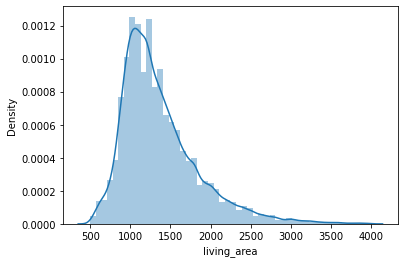

In [161]:
processed_df = processed_df[processed_df['living_area'] > 500]
processed_df = processed_df[processed_df['living_area'] < 4000]
processed_df['living_area'] = processed_df['living_area'].astype(int)

sns.distplot(processed_df['living_area'])

In [162]:
print(len(processed_df))

83458


## Lot Dimensions

In [163]:
processed_df['lot_dimensions'].value_counts(dropna=False).iloc[0:5]

6000.0    1851
5000.0    1421
NaN       1128
7000.0     684
6500.0     569
Name: lot_dimensions, dtype: int64

In [164]:
mean_lot_dimensions = processed_df['lot_dimensions'].dropna().mean()
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lot_dimensions', ylabel='Density'>

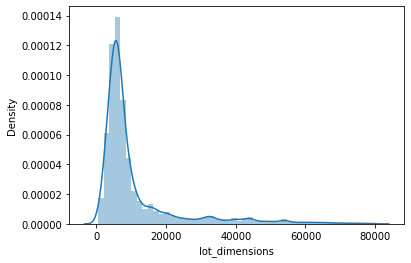

In [165]:
processed_df = processed_df[processed_df['lot_dimensions'] > 500]
processed_df = processed_df[processed_df['lot_dimensions'] < 80000]
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].astype(int)

sns.distplot(processed_df['lot_dimensions'])

In [166]:
print(len(processed_df))

80710


## Bedrooms, Bathrooms & Levels

In [167]:
processed_df['bedrooms'].value_counts(dropna=False)

3.0     36196
4.0     25573
2.0     10223
5.0      6850
6.0      1008
1.0       475
7.0       170
NaN       133
8.0        50
9.0        16
10.0        8
11.0        4
15.0        1
13.0        1
17.0        1
2.5         1
Name: bedrooms, dtype: int64

In [168]:
processed_df['bathrooms'].value_counts(dropna=False)

2.0       41261
1.0       36278
3.0        2914
4.0         148
NaN          77
5.0          21
6.0           5
8.0           2
7.0           1
11.0          1
10.0          1
2008.0        1
Name: bathrooms, dtype: int64

In [169]:
processed_df['levels'].value_counts(dropna=False)

1.0       39306
2.0       38762
3.0        1645
NaN         883
4.0         104
5.0           6
11.0          1
6.0           1
1816.0        1
768.0         1
Name: levels, dtype: int64

In [170]:
processed_df = processed_df[processed_df['bedrooms'] < 7]
processed_df = processed_df[processed_df['bathrooms'] < 5]
processed_df = processed_df[processed_df['levels'] < 4]

processed_df['bedrooms'] = processed_df['bedrooms'].astype(int)
processed_df['bathrooms'] = processed_df['bathrooms'].astype(int)
processed_df['levels'] = processed_df['levels'].astype(int)

In [171]:
print(len(processed_df))

79273


## Listing Date

In [172]:
processed_df['listing_date'].value_counts(dropna=False).iloc[0:5]

201907.0    3862
202006.0    1163
202005.0    1113
202009.0    1089
202002.0    1054
Name: listing_date, dtype: int64

In [173]:
processed_df['listing_date'] = pd.to_datetime(processed_df['listing_date'], format='%Y%m')

## Year of Construction

In [174]:
processed_df['year_of_construction'].value_counts(dropna=False).iloc[0:5]

NaN       6774
2010.0    2687
2011.0    2362
2008.0    2337
2009.0    2243
Name: year_of_construction, dtype: int64

In [175]:
mean_year_of_constructions = processed_df['year_of_construction'].dropna().mean()
processed_df['year_of_construction'] = processed_df['year_of_construction'].fillna(mean_living_area)

In [176]:
years = processed_df['year_of_construction'].value_counts()
processed_df = processed_df[processed_df['year_of_construction'].isin(years.keys())]
processed_df['year_of_construction'] = processed_df['year_of_construction'].astype(int)

In [177]:
print(len(processed_df))

79273


## Municipal Evaluation

In [178]:
processed_df['municipal_eval'].value_counts(dropna=False).iloc[0:5]

NaN         39870
230000.0       96
215000.0       94
220000.0       93
250000.0       90
Name: municipal_eval, dtype: int64

In [179]:
drop_municipal_eval = True

In [180]:
if drop_municipal_eval:
    processed_df = processed_df.drop(['municipal_eval'], axis=1)
else:
    processed_df = processed_df[processed_df['municipal_eval'] > 2000]
    processed_df = processed_df[processed_df['municipal_eval'] < 1000000]
    processed_df['municipal_eval'] = processed_df['municipal_eval'].astype(int)

    sns.distplot(processed_df['municipal_eval'])

## Price

In [181]:
processed_df['price'].value_counts(dropna=False).iloc[0:5]

NaN         17476
250000.0      731
260000.0      654
235000.0      645
225000.0      641
Name: price, dtype: int64

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

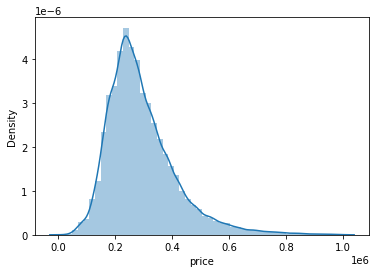

In [182]:
processed_df = processed_df[processed_df['price'] > 2000]
processed_df = processed_df[processed_df['price'] < 1000000]
processed_df['price'] = processed_df['price'].astype(int)

sns.distplot(processed_df['price'])

In [183]:
processed_df.head()

,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,price
0,2 storey,1191,4076,3,1,2,Beauport,2020-12-01,2004,332500
0,Open area,1261,9500,2,1,1,Deschambault,2021-12-01,1957,265000
0,Unknown,1645,1360,3,1,3,Mercier,2021-11-01,2006,612000
0,Link,2024,17000,4,3,1,Stoneham,2021-12-01,2019,526500
0,2 storey,2400,4471,4,2,2,Gatineau,2021-12-01,1989,360000


## Location

In [184]:
processed_df['location'].value_counts(dropna=False).iloc[50:70]

Chateauguay                 286
Boisbriand                  277
Candiac                     272
Pointe-Aux-Trembles         270
Cap-Rouge                   263
L'Ancienne-Lorette          247
Bromont                     243
St-Colomban                 242
Marieville                  241
Ste-Marie                   229
Val-Des-Monts               227
St-Basile-Le-Grand          226
Ste-Catherine               224
Salaberry-De-Valleyfield    217
Deux-Montagnes              212
Bécancour                   206
St-Étienne-De-Lauzon        202
Ste-Sophie                  200
Prévost                     199
Chomedey                    198
Name: location, dtype: int64

In [185]:
locations = processed_df['location'].value_counts()
processed_df = processed_df[processed_df['location'].isin(locations.keys()[0:100])]

In [186]:
print(len(raw_df))
print(len(processed_df))

86197
44357


In [187]:
processed_df.to_csv('../data/processed/processed_listings.csv', index=False)